# Other Supervised Learning

## Naive Bayes Classifiers

In [1]:
# load the iris dataset 
from sklearn.datasets import load_iris 
iris = load_iris() 

# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


## Support Vector Machines(SVMs)

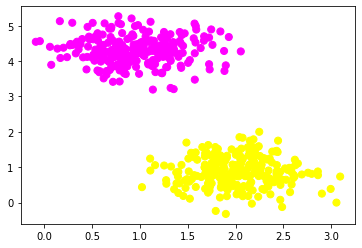

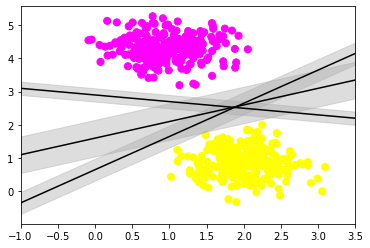

In [2]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 

# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40) 
import matplotlib.pyplot as plt 
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show() 


# What Support vector machines do, is to not only draw a line between two classes here, but consider a region about the line of some given width

import numpy as np
# creating line space between -1 to 3.5 
xfit = np.linspace(-1, 3.5) 

# plotting scatter 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring') 

# plot a line between the different sets of data 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
	yfit = m * xfit + b 
	plt.plot(xfit, yfit, '-k') 
	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
	color='#AAAAAA', alpha=0.4) 

plt.xlim(-1, 3.5); 
plt.show() 

## SVM Hyperparameter Tuning using GridSearchCV

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 

cancer = load_breast_cancer() 

# The data set is presented in a dictionary form: 
print(cancer.keys()) 

df_feat = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 

# cancer column is our target 
df_target = pd.DataFrame(cancer['target'], columns =['Cancer']) 

print("Feature Variables: ") 
print(df_feat.info()) 

print("Dataframe looks like : ") 
print(df_feat.head()) 

# Train Test Split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size = 0.30, random_state = 101) 

# Train the Support Vector Classifier without Hyper-parameter Tuning
# train the model on train set 
model = SVC() 
model.fit(X_train, y_train) 

# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 


# Use GridsearchCV
from sklearn.model_selection import GridSearchCV 
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			  'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
grid_predictions = grid.predict(X_test) 
# print classification report 
print(classification_report(y_test, grid_predictions)) 



  0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  


## Using SVM to perform classification on a non-linear dataset

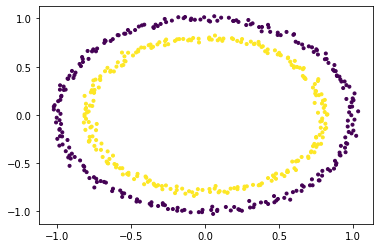

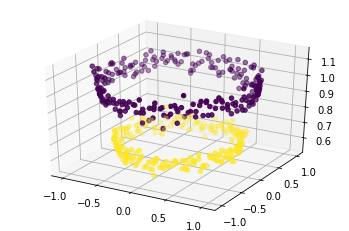

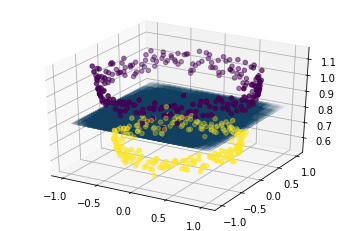

In [4]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 

# generating data 
X, Y = make_circles(n_samples = 500, noise = 0.02) 

# visualizing data 
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') 
plt.show() 

# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3)) 

# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
plt.show() 

# create support vector classifier using a linear kernel 
from sklearn import svm 

svc = svm.SVC(kernel = 'linear') 
svc.fit(X, Y) 
w = svc.coef_ 
b = svc.intercept_ 

# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 

## Decision Tree

In [5]:
# Ref: https://www.geeksforgeeks.org/decision-tree-implementation-python/

# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# Function importing Dataset 
def importdata(): 
	balance_data = pd.read_csv( 
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data', 
	sep= ',', header = None) 
	
	# Printing the dataswet shape 
	print ("Dataset Length: ", len(balance_data)) 
	print ("Dataset Shape: ", balance_data.shape) 
	
	# Printing the dataset obseravtions 
	print ("Dataset: ",balance_data.head()) 
	return balance_data 

# Function to split the dataset 
def splitdataset(balance_data): 

	# Separating the target variable 
	X = balance_data.values[:, 1:5] 
	Y = balance_data.values[:, 0] 

	# Splitting the dataset into train and test 
	X_train, X_test, y_train, y_test = train_test_split( 
	X, Y, test_size = 0.3, random_state = 100) 
	
	return X, Y, X_train, X_test, y_train, y_test 
	
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

	# Creating the classifier object 
	clf_gini = DecisionTreeClassifier(criterion = "gini", 
			random_state = 100,max_depth=3, min_samples_leaf=5) 

	# Performing training 
	clf_gini.fit(X_train, y_train) 
	return clf_gini 
	
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 

	# Decision tree with entropy 
	clf_entropy = DecisionTreeClassifier( 
			criterion = "entropy", random_state = 100, 
			max_depth = 3, min_samples_leaf = 5) 

	# Performing training 
	clf_entropy.fit(X_train, y_train) 
	return clf_entropy 


# Function to make predictions 
def prediction(X_test, clf_object): 

	# Predicton on test with giniIndex 
	y_pred = clf_object.predict(X_test) 
	print("Predicted values:") 
	print(y_pred) 
	return y_pred 
	
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
	
	print("Confusion Matrix: ", 
		confusion_matrix(y_test, y_pred)) 
	
	print ("Accuracy : ", 
	accuracy_score(y_test,y_pred)*100) 
	
	print("Report : ", 
	classification_report(y_test, y_pred)) 

# Driver code 
def main(): 
	
	# Building Phase 
	data = importdata() 
	X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
	clf_gini = train_using_gini(X_train, X_test, y_train) 
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
	
	# Operational Phase 
	print("Results Using Gini Index:") 
	
	# Prediction using gini 
	y_pred_gini = prediction(X_test, clf_gini) 
	cal_accuracy(y_test, y_pred_gini) 
	
	print("Results Using Entropy:") 
	# Prediction using entropy 
	y_pred_entropy = prediction(X_test, clf_entropy) 
	cal_accuracy(y_test, y_pred_entropy) 
	
	
# Calling main function 
if __name__=="__main__": 
	main() 


Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 

## Decision Tree Regression using sklearn

[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]
[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]
[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


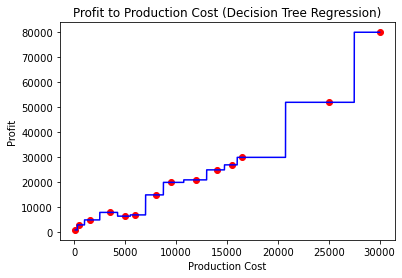

In [6]:
## Step 1: Import the required libraries.

# import numpy package for arrays and stuff 
import numpy as np 

# import matplotlib.pyplot for plotting our result 
import matplotlib.pyplot as plt 

# import pandas for importing csv files 
import pandas as pd 

## Step 2: Initialize and print the Dataset

# import dataset 
# dataset = pd.read_csv('Data.csv') 
# alternatively open up .csv file to read data 

dataset = np.array( 
[['Asset Flip', 100, 1000], 
['Text Based', 500, 3000], 
['Visual Novel', 1500, 5000], 
['2D Pixel Art', 3500, 8000], 
['2D Vector Art', 5000, 6500], 
['Strategy', 6000, 7000], 
['First Person Shooter', 8000, 15000], 
['Simulator', 9500, 20000], 
['Racing', 12000, 21000], 
['RPG', 14000, 25000], 
['Sandbox', 15500, 27000], 
['Open-World', 16500, 30000], 
['MMOFPS', 25000, 52000], 
['MMORPG', 30000, 80000] 
]) 

# print the dataset 
print(dataset) 

## Step 3: Select all the rows and column 1 from dataset to “X”
# select all rows by : and column 1 
# by 1:2 representing features 
X = dataset[:, 1:2].astype(int) 

# print X 
print(X) 

## Step 4: Select all of the rows and column 2 from dataset to “y”
# select all rows by : and column 2 
# by 2 to Y representing labels 
y = dataset[:, 2].astype(int) 

# print y 
print(y) 

## Step 5: Fit decision tree regressor to the dataset
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0) 

# fit the regressor with X and Y data 
regressor.fit(X, y) 

## Step 6: Predicting a new value
# predicting a new value 

# test the output by changing values, like 3750 
# y_pred = regressor.predict(3750) 

# print the predicted price 
# print("Predicted price: % d\n"% y_pred) 

## Step 7: Visualising the result
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two 
# consecutive values 
X_grid = np.arange(min(X), max(X), 0.01) 

# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make 
# a column out of the X_grid values 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# scatter plot for original data 
plt.scatter(X, y, color = 'red') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 

# specify title 
plt.title('Profit to Production Cost (Decision Tree Regression)') 

# specify X axis label 
plt.xlabel('Production Cost') 

# specify Y axis label 
plt.ylabel('Profit') 

# show the plot 
plt.show() 

## Step 8: The tree is finally exported and shown in the TREE STRUCTURE below, visualized using http://www.webgraphviz.com/ by copying the data from the ‘tree.dot’ file.
# import export_graphviz 
from sklearn.tree import export_graphviz 

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', feature_names =['Production Cost']) 

## Random Forest

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


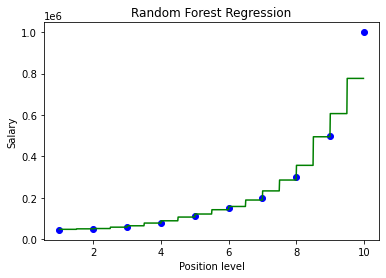

In [7]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

data = pd.read_csv('Salaries.csv') 
print(data) 

x = data.iloc[:, 1:2].values 
y = data.iloc[:, 2].values 

# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(x, y) 

Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1)) # test the output by changing values 

# Visualising the Random Forest Regression results 

# arange for creating a range of values 
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values 
X_grid = np.arange(min(x), max(x), 0.01) 

# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value				 
X_grid = X_grid.reshape((len(X_grid), 1)) 

# Scatter plot for original data 
plt.scatter(x, y, color = 'blue') 

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid), 
		color = 'green') 
plt.title('Random Forest Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()

## Bagging classifier

In [8]:
from sklearn.datasets import load_wine
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd 

# load the data 
X, Y = load_wine(return_X_y=True)

kfold = model_selection.KFold(n_splits = 3, random_state = 1) 

# initialize the base classifier 
base_cls = DecisionTreeClassifier() 

# no. of base classifier 
num_trees = 500

# bagging classifier 
model = BaggingClassifier(base_estimator = base_cls, n_estimators = num_trees, random_state = 1) 

results = model_selection.cross_val_score(model, X, Y, cv = kfold) 
print("accuracy :") 
print(results.mean()) 

accuracy :
0.2597928436911488


## Voting Classifier

In [9]:
# https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/

# importing libraries 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 

# loading iris dataset 
iris = load_iris() 
X = iris.data[:, :4] 
Y = iris.target 

# train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42) 

# group / ensemble of models 
estimator = [] 
estimator.append(('LR', LogisticRegression(solver ='lbfgs', 
									multi_class ='multinomial', 
									max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

# Voting Classifier with hard voting 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(X_train, y_train) 
y_pred = vot_hard.predict(X_test) 

# using accuracy_score metric to predict accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score) 

# Voting Classifier with soft voting 
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(X_train, y_train) 
y_pred = vot_soft.predict(X_test) 

# using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 

Hard Voting Score  1
Soft Voting Score  1
